In [5]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### Data Preparation

In [6]:
# Saving filepaths of all csv files on desktop
file_paths = glob.glob(r"C:\Users\zatac\Desktop/*.csv")
shots_dataframes = []

# Reading all csv files and storing them in a list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    shots_dataframes.append(df)

total_rows = 0

# Displaying the shape of all DataFrames and calculating total number of rows
for dataf in shots_dataframes:
    print(dataf.shape)
    total_rows += dataf.shape[0]

print("Total number of rows:", total_rows)

# Merging all DataFrames into one single DataFrame
shots = pd.concat(shots_dataframes)
print("Shape of the merged DataFrame:", shots.shape)

(189803, 26)
(200501, 26)
(161205, 26)
(207893, 26)
(188116, 26)
(218701, 26)
Total number of rows: 1166219
Shape of the merged DataFrame: (1166219, 26)


In [7]:
shots.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.3,24.45,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Right Side,R,16-24 ft.,-15.8,7.85,16,6,0,55


In [8]:
# Displaying all the unique values within the columns
for i in shots.columns:
    print(i)
    print(shots[i].unique(), "\n")

SEASON_1
[2004 2008 2012 2016 2020 2024] 

SEASON_2
['2003-04' '2007-08' '2011-12' '2015-16' '2019-20' '2023-24'] 

TEAM_ID
[1610612747 1610612757 1610612737 1610612738 1610612743 1610612759
 1610612762 1610612763 1610612741 1610612751 1610612750 1610612748
 1610612756 1610612745 1610612755 1610612764 1610612754 1610612740
 1610612746 1610612760 1610612758 1610612742 1610612744 1610612753
 1610612749 1610612761 1610612752 1610612739 1610612765 1610612766] 

TEAM_NAME
['Los Angeles Lakers' 'Portland Trail Blazers' 'Atlanta Hawks'
 'Boston Celtics' 'Denver Nuggets' 'San Antonio Spurs' 'Utah Jazz'
 'Memphis Grizzlies' 'Chicago Bulls' 'New Jersey Nets'
 'Minnesota Timberwolves' 'Miami Heat' 'Phoenix Suns' 'Houston Rockets'
 'Philadelphia 76ers' 'Washington Wizards' 'Indiana Pacers'
 'New Orleans Hornets' 'Los Angeles Clippers' 'Seattle SuperSonics'
 'Sacramento Kings' 'Dallas Mavericks' 'Golden State Warriors'
 'Orlando Magic' 'Milwaukee Bucks' 'Toronto Raptors' 'New York Knicks'
 'Clevela

In [9]:
# Selecting and renaming the columns that will be used in the project
shots = shots[["SEASON_1", "TEAM_NAME", "PLAYER_NAME", "POSITION_GROUP", "SHOT_MADE", "SHOT_TYPE", "BASIC_ZONE"]]
shots.rename(columns={"SEASON_1": "YEAR"}, inplace = True)
shots.head()

,YEAR,TEAM_NAME,PLAYER_NAME,POSITION_GROUP,SHOT_MADE,SHOT_TYPE,BASIC_ZONE
0,2004,Los Angeles Lakers,Kobe Bryant,G,True,3PT Field Goal,Above the Break 3
1,2004,Portland Trail Blazers,Damon Stoudamire,G,True,2PT Field Goal,Restricted Area
2,2004,Los Angeles Lakers,Kobe Bryant,G,False,2PT Field Goal,Mid-Range
3,2004,Portland Trail Blazers,Damon Stoudamire,G,True,2PT Field Goal,Mid-Range
4,2004,Portland Trail Blazers,Damon Stoudamire,G,False,2PT Field Goal,Mid-Range


### Exploring the Data

In [10]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166219 entries, 0 to 218700
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   YEAR            1166219 non-null  int64 
 1   TEAM_NAME       1166219 non-null  object
 2   PLAYER_NAME     1166219 non-null  object
 3   POSITION_GROUP  1164098 non-null  object
 4   SHOT_MADE       1166219 non-null  bool  
 5   SHOT_TYPE       1166219 non-null  object
 6   BASIC_ZONE      1166219 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 63.4+ MB


In [11]:
shots.describe()

,YEAR
count,1.166219e+06
mean,2.014264e+03
std,6.944100e+00
min,2.004000e+03
25%,2.008000e+03
50%,2.016000e+03
75%,2.020000e+03
max,2.024000e+03


In [12]:
shots.isna().sum()

YEAR                 0
TEAM_NAME            0
PLAYER_NAME          0
POSITION_GROUP    2121
SHOT_MADE            0
SHOT_TYPE            0
BASIC_ZONE           0
dtype: int64

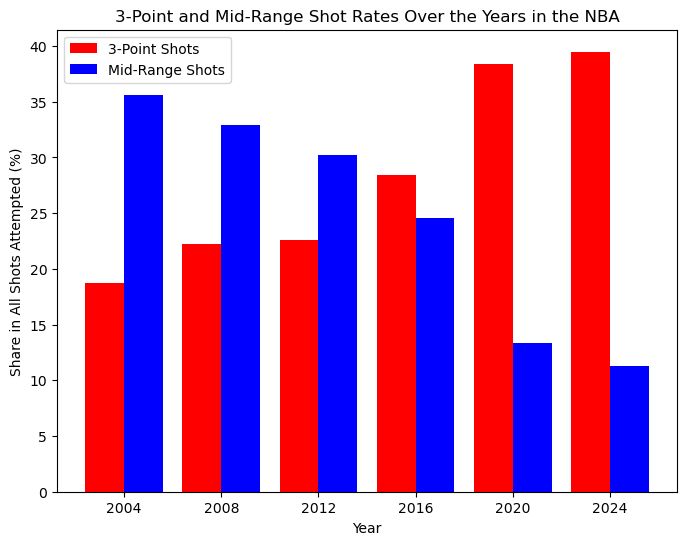

In [13]:
# Calcutating the three point rate by year
three_pointers = shots[shots["SHOT_TYPE"] == "3PT Field Goal"]
total_3s = three_pointers.groupby("YEAR").size()
total_shots = shots.groupby("YEAR").size()
perc_of_3s = (total_3s / total_shots) * 100

# Calcutating the mid-range shots rate by year
mid_range = shots[shots["BASIC_ZONE"] == "Mid-Range"]
total_mid_range = mid_range.groupby("YEAR").size()
total_shots = shots.groupby("YEAR").size()
perc_of_mid_range = (total_mid_range / total_shots) * 100

# Plotting the change in 3-point and mid-range shot rates over the years
years = perc_of_3s.index
bar_width = 0.4
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(r1, perc_of_3s, color="red", width=bar_width, label="3-Point Shots")
ax.bar(r2, perc_of_mid_range, color="blue", width=bar_width, label="Mid-Range Shots")
ax.set_xlabel("Year")
ax.set_ylabel("Share in All Shots Attempted (%)")
ax.set_title("3-Point and Mid-Range Shot Rates Over the Years in the NBA")
ax.set_xticks([r + bar_width / 2 for r in range(len(years))])
ax.set_xticklabels(years)
ax.legend()
plt.show()

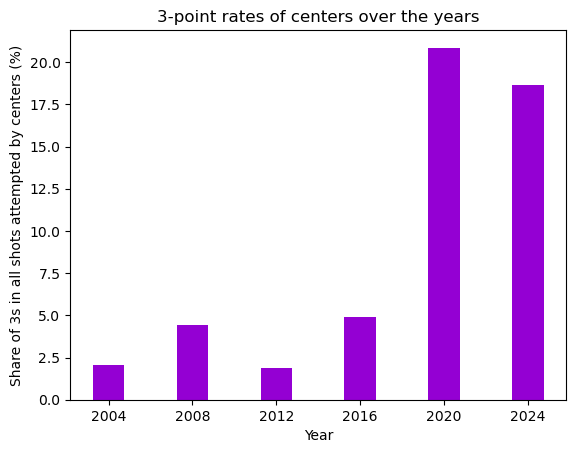

In [14]:
# Calcutating the three point rate attempted by centers by year
c_three_pointers = shots[(shots["SHOT_TYPE"] == "3PT Field Goal") & (shots["POSITION_GROUP"] == "C")]
c_total_3s = c_three_pointers.groupby("YEAR").size()
c_total_shots = shots[shots["POSITION_GROUP"] == "C"].groupby("YEAR").size()
c_perc_of_3s = (c_total_3s / c_total_shots) * 100

# Plotting the change in 3-point rates attempted by centers over the years
plt.bar(c_perc_of_3s.index, c_perc_of_3s, color="darkviolet", width = 1.5)
plt.xticks(c_perc_of_3s.index)
plt.title("3-point rates of centers over the years")
plt.xlabel("Year")
plt.ylabel("Share of 3s in all shots attempted by centers (%)")
plt.show()

In [15]:
shots_2024 = shots[shots["YEAR"] == 2024]
threes_2024 = shots_2024[shots_2024["SHOT_TYPE"] == "3PT Field Goal"]

# Finding the team with the most 3-point attempts in 2024
threes_by_team_2024 = threes_2024.groupby("TEAM_NAME").size()
team_most_threes = threes_by_team_2024.idxmax()
max_threes = threes_by_team_2024.max()

# Finding the 3-point ratio of that team
total_shots_most_three_team = shots_2024[shots_2024["TEAM_NAME"] == team_most_threes].shape[0]
most3_team_3p_ratio = (max_threes / total_shots_most_three_team) * 100

print(f"The team that attempted the most 3-pointers in 2024 is the {team_most_threes} with {max_threes} attempts. {most3_team_3p_ratio:.2f}% of their shot attempts are 3-pointers.")

The team that attempted the most 3-pointers in 2024 is the Boston Celtics with 3482 attempts. 47.08% of their shot attempts are 3-pointers.


In [16]:
shots_2024 = shots[shots["YEAR"] == 2024]
threes_2024 = shots_2024[shots_2024["SHOT_TYPE"] == "3PT Field Goal"]

# Finding the player with the most 3-point attempts in 2024
threes_by_player_2024 = threes_2024.groupby("PLAYER_NAME").size()
player_most_threes = threes_by_player_2024.idxmax()
max_threes_by_player = threes_by_player_2024.max()

# Finding the 3-point ratio of that player
total_shots_most_three_player = shots_2024[shots_2024["PLAYER_NAME"] == player_most_threes].shape[0]
most3_player_3p_ratio = (max_threes_by_player / total_shots_most_three_player) * 100

print(f"The player that attempted the most 3-pointers in 2024 is {player_most_threes} with {max_threes_by_player} attempts. {most3_player_3p_ratio:.2f}% of his shot attempts are 3-pointers.")

The player that attempted the most 3-pointers in 2024 is Stephen Curry with 876 attempts. 60.62% of his shot attempts are 3-pointers.


In [17]:
# Finding the player that played in all selected seasons
player_season_counts = shots.groupby('PLAYER_NAME')['YEAR'].nunique()
psc = player_season_counts[player_season_counts == 6].index[0]
print("Player(s) that played in all these 6 seasons:", psc)

Player(s) that played in all these 6 seasons: LeBron James


## Logistic Regression from scratch

In [18]:
class LogisticRegression_scratch:
    def __init__(self, learning_rate = 0.01, epochs = 1000, lambda_ = 0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.lambda_ = lambda_

    def sigmoid(self, z):
        z = np.array(z, dtype=np.float64)
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y, y_pred):
        y = np.array(y, dtype = np.float64)
        y_pred = np.array(y_pred, dtype = np.float64)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        l2_penalty = (self.lambda_ / (2 * len(y))) * (np.sum(self.weights ** 2))
        return loss
    
    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_predict = self.sigmoid(z)

            # Finding gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y)) + (self.lambda_ / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predict - y)

            # Updating parameters    
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db


    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        z = np.dot(X, self.weights) + self.bias
        y_probabilities = self.sigmoid(z)
        y_predicted_labels = []
        for j in y_probabilities:
            if j >= 0.5:
                y_predicted_labels.append(1)
            else:
                y_predicted_labels.append(0)
        return np.array(y_predicted_labels)


    def accuracy(self, y_test, y_predict):
        return np.mean(y_test == y_predict)

In [19]:
shots_rand_50k = shots.sample(n = 50000)
X = pd.get_dummies(shots_rand_50k.drop(["SHOT_MADE", "POSITION_GROUP"], axis=1))
y = shots_rand_50k["SHOT_MADE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 1586)
(15000, 1586)
(35000,)
(15000,)


In [20]:
learning_rates = [0.0001, 0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
accuracies = []

for lr in learning_rates:
    logreg = LogisticRegression_scratch(learning_rate = lr)
    logreg.fit(X_train, y_train)
    predictions = logreg.predict(X_test)
    acc = logreg.accuracy(y_test, predictions)
    print("Learning rate:", lr, "," ,"Accuracy:", acc)
    accuracies.append(acc)

optimal_lr_index = np.argmax(accuracies)
optimal_lr = learning_rates[optimal_lr_index]
print("\nOptimal Learning Rate:", optimal_lr, ",", "Accuracy:", accuracies[optimal_lr_index])

Learning rate: 0.0001 , Accuracy: 0.4514


C:\Users\zatac\AppData\Local\Temp\ipykernel_11344\2654767631.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Learning rate: 0.001 , Accuracy: 0.4514
Learning rate: 0.003 , Accuracy: 0.4514
Learning rate: 0.01 , Accuracy: 0.5486
Learning rate: 0.03 , Accuracy: 0.5486
Learning rate: 0.05 , Accuracy: 0.5486
Learning rate: 0.1 , Accuracy: 0.5486
Learning rate: 0.3 , Accuracy: 0.5486
Learning rate: 0.5 , Accuracy: 0.5486

Optimal Learning Rate: 0.01 , Accuracy: 0.5486


## Logistic Regression with scikit-learn

In [29]:
logreg_skl = LogisticRegression()
logreg_skl.fit(X_train, y_train)
y_pred = logreg_skl.predict(X_test)
accur = np.mean(y_test == y_pred)
print(f"Accuracy: {accur:.4f}")

C:\Users\zatac\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6187
